# Projeto: Report de mercado

### Objetivo:

* Automação de um relatório de fechamento de mercado com o Python através da coleta de cotações históricas do Ibovespa e Dólar e do envio diário através de uma ferramenta de e-mail automaticamente.  

### Passo a passo:

*   **Passo 1** - Instalar e importar os módulos e bibliotecas.
   
   
*   **Passo 2** - Pegar as cotações históricas.
   
   
*   **Passo 3** - Tratar dados coletados.
   
   
*   **Passo 4** - Criar gráficos de performance.
   
   
*   **Passo 5** - Calcular retornos diários.
   
   
*   **Passo 6** - Configurar e enviar o e-mail.

   
-------------------

# Passo 1 - Instalar e importar os módulos e bibliotecas.

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk


# Passo 2 - Pegar as cotações históricas

In [2]:
tickers = ['^BVSP', '^GSPC', 'BRL=X']

In [3]:
dados_mercado = yf.download(tickers, period = '6mo')
dados_mercado = dados_mercado['Adj Close']
dados_mercado

[*********************100%%**********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-20,5.03000,129125.0000,NaN
2024-03-21,4.96620,128159.0000,5241.529785
2024-03-22,4.97450,127027.0000,5234.180176
2024-03-25,5.00090,126931.0000,5218.189941
2024-03-26,4.97220,126863.0000,5203.580078
...,...,...,...
2024-09-16,5.61237,135118.0000,5633.089844
2024-09-17,5.50390,134960.0000,5634.580078
2024-09-18,5.48170,133748.0000,5618.259766


# Passo 3 - Tratar dados coletados.

In [4]:
dados_mercado = dados_mercado.dropna()

dados_mercado

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-21,4.96620,128159.0000,5241.529785
2024-03-22,4.97450,127027.0000,5234.180176
2024-03-25,5.00090,126931.0000,5218.189941
2024-03-26,4.97220,126863.0000,5203.580078
2024-03-27,4.97570,127691.0000,5248.490234
...,...,...,...
2024-09-16,5.61237,135118.0000,5633.089844
2024-09-17,5.50390,134960.0000,5634.580078
2024-09-18,5.48170,133748.0000,5618.259766


In [5]:
dados_mercado.columns = ['DOLAR', 'IBOVESPA', 'S&P500']

dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-21,4.96620,128159.0000,5241.529785
2024-03-22,4.97450,127027.0000,5234.180176
2024-03-25,5.00090,126931.0000,5218.189941
2024-03-26,4.97220,126863.0000,5203.580078
2024-03-27,4.97570,127691.0000,5248.490234
...,...,...,...
2024-09-16,5.61237,135118.0000,5633.089844
2024-09-17,5.50390,134960.0000,5634.580078
2024-09-18,5.48170,133748.0000,5618.259766


# Passo 4 - Criar gráficos de performance.

In [6]:
plt.style.use('cyberpunk')

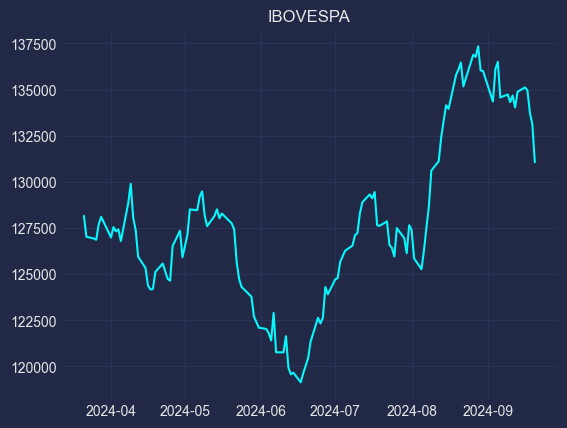

In [7]:
plt.plot(dados_mercado['IBOVESPA'])
plt.title('IBOVESPA')

plt.savefig('ibovespa.png')

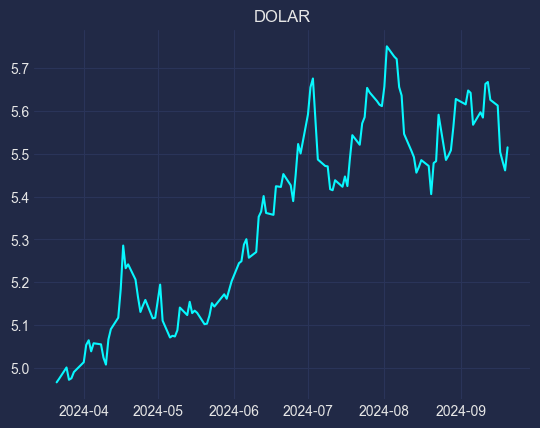

In [8]:
plt.plot(dados_mercado['DOLAR'])
plt.title('DOLAR')

plt.savefig('dolar.png')

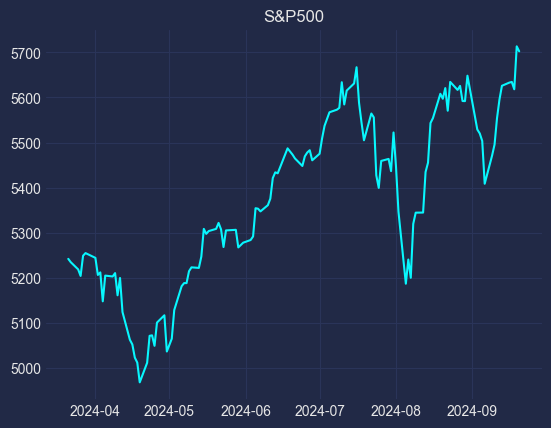

In [9]:
plt.plot(dados_mercado['S&P500'])
plt.title('S&P500')

plt.savefig('sp500.png')

# Passo 5 - Calcular retornos diários.

In [10]:
retornos_diarios = dados_mercado.pct_change()

retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-21,NaN,NaN,NaN
2024-03-22,0.001671,-0.008833,-0.001402
2024-03-25,0.005307,-0.000756,-0.003055
2024-03-26,-0.005739,-0.000536,-0.002800
2024-03-27,0.000704,0.006527,0.008631
...,...,...,...
2024-09-16,-0.002369,0.001750,0.001257
2024-09-17,-0.019327,-0.001169,0.000265
2024-09-18,-0.004034,-0.008980,-0.002896


In [11]:
retorno_dolar = retornos_diarios['DOLAR'].iloc[-1]
retorno_ibovespa = retornos_diarios['IBOVESPA'].iloc[-1]
retorno_sp = retornos_diarios['S&P500'].iloc[-1]

In [12]:
retorno_dolar = str(round(retorno_dolar * 100, 2)) + '%'
retorno_ibovespa = str(round(retorno_ibovespa * 100, 2)) + '%'
retorno_sp = str(round(retorno_sp * 100, 2)) + '%'


retorno_dolar

'0.99%'

In [13]:
retorno_ibovespa

'-1.55%'

In [14]:
retorno_sp

'-0.19%'

# Passo 6 - Configurar e enviar o e-mail

In [15]:
import win32com.client as win32

In [16]:
outlook = win32.Dispatch('outlook.application')

email = outlook.CreateItem(0)

In [17]:
email.To = 'rioalmir8001@gmail.com'
email.Subject = 'Relatório de Mercado'
email.Body = f'''Prezado diretor, segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa}.
* O Dólar teve o retorno de {retorno_dolar}.
* O S&P500 teve o retorno de {retorno_sp}.

Segue em anexo a peformance dos ativos nos últimos 6 meses.

Att,
Melhor estagiário do mundo


'''

anexo_ibovespa = r"D:\Projects\financas\Varos\Relatório fechamento de mercado\ibovespa.png"
anexo_dolar = r"D:\Projects\financas\Varos\Relatório fechamento de mercado\dolar.png"
anexo_sp = r"D:\Projects\financas\Varos\Relatório fechamento de mercado\sp500.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp)

email.Send()